In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["royalblue", "orchid", "limegreen"])

In [39]:
curve_df = pd.read_csv("data/curve/last_model_curve", names=["model", "epoch", "test_acc"])
fps_df = pd.read_csv("data/fps/last_model_fps", names=["model", "epoch", "test_acc"])

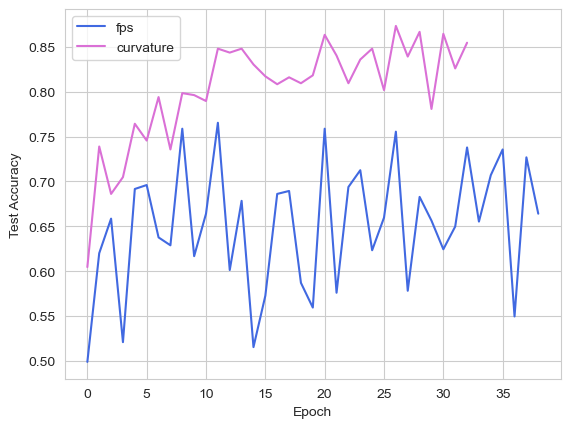

In [41]:
plt.figure()
plt.plot(fps_df["test_acc"],label="fps")
plt.plot(curve_df["test_acc"],label="curvature")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.show()